In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [2]:
customers_df = pd.read_csv(r'C:\Users\ASUS\Desktop\PythonProjects\Assignment_Zeotap\Datasets\Customers.csv')

transactions_df = pd.read_csv(r'C:\Users\ASUS\Desktop\PythonProjects\Assignment_Zeotap\Datasets\Transactions.csv')

In [3]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
customers_df.shape

(200, 4)

In [6]:
transactions_df.shape

(1000, 7)

In [7]:
customers_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [8]:
transactions_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [9]:
# Merge customer and transaction data
df = transactions_df.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "TransactionID": "count"
}).reset_index()

In [10]:
df.head()

,CustomerID,TotalValue,TransactionID
0,C0001,3354.52,5
1,C0002,1862.74,4
2,C0003,2725.38,4
3,C0004,5354.88,8
4,C0005,2034.24,3


In [11]:
final_df = pd.merge(customers_df, df, on="CustomerID", how="inner")

In [12]:
final_df.head()

,CustomerID,CustomerName,Region,SignupDate,TotalValue,TransactionID
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3


In [13]:
final_df.rename(columns={"TotalValue": "TotalSpent", "TransactionID": "TransactionCount"}, inplace=True)

In [14]:
final_df.head()

,CustomerID,CustomerName,Region,SignupDate,TotalSpent,TransactionCount
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3


In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        199 non-null    object 
 1   CustomerName      199 non-null    object 
 2   Region            199 non-null    object 
 3   SignupDate        199 non-null    object 
 4   TotalSpent        199 non-null    float64
 5   TransactionCount  199 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [16]:
# Feature selection
X = final_df[["TotalSpent", "TransactionCount"]]

In [17]:
X.head()

,TotalSpent,TransactionCount
0,3354.52,5
1,1862.74,4
2,2725.38,4
3,5354.88,8
4,2034.24,3


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled

array([[-0.06170143, -0.01145819],
       [-0.87774353, -0.46749414],
       [-0.40585722, -0.46749414],
       [ 1.03254704,  1.35664965],
       [-0.78392861, -0.92353008],
       [ 0.41587942, -0.46749414],
       [-0.48548229, -0.92353008],
       [ 0.43997044,  2.26872154],
       [-1.40630171, -0.92353008],
       [-0.9571662 , -0.46749414],
       [ 0.14369581, -0.01145819],
       [ 0.96492372,  0.9006137 ],
       [ 1.38575064,  0.9006137 ],
       [-1.72239508, -1.83560198],
       [-1.26353893, -1.37956603],
       [ 0.22269727, -0.01145819],
       [ 0.70375173,  1.35664965],
       [ 0.71908486, -0.01145819],
       [-0.70101045,  0.44457776],
       [-1.39212827, -1.83560198],
       [ 1.0681256 ,  1.35664965],
       [ 0.64973294,  0.44457776],
       [ 0.92520418,  0.44457776],
       [ 0.08736309,  0.9006137 ],
       [-1.02704328, -0.46749414],
       [ 0.04471149, -0.46749414],
       [-0.49471609, -0.46749414],
       [ 1.83377022,  1.35664965],
       [-0.9197934 ,

In [20]:
# Determine Optimal Number of Clusters using Elbow Method
inertia = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

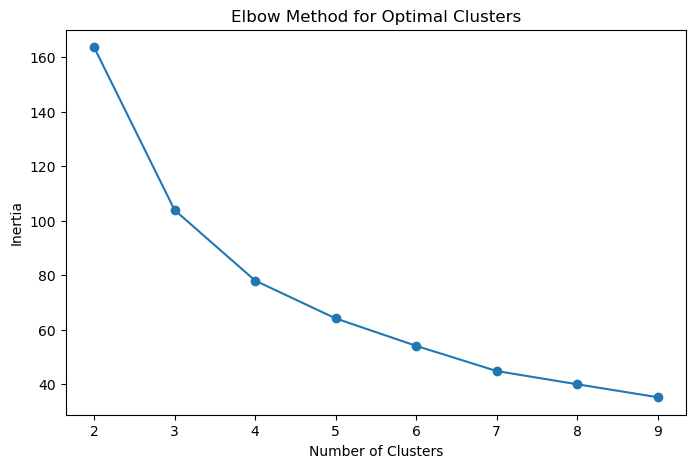

In [21]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [22]:
# Perform Clustering with Optimal Number of Clusters
# Assuming we choose k=4 based on the elbow plot
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [23]:
# Add Cluster Labels to the DataFrame
final_df['Cluster'] = clusters

In [24]:
final_df

,CustomerID,CustomerName,Region,SignupDate,TotalSpent,TransactionCount,Cluster
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5,3
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4,3
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4,3
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8,0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3,1
...,...,...,...,...,...,...,...
194,C0196,Laura Watts,Europe,2022-06-07,4982.88,4,2
195,C0197,Christina Harvey,Europe,2023-03-21,1928.65,3,1
196,C0198,Rebecca Ray,Europe,2022-02-27,931.83,2,1
197,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,4,3


In [25]:
# Evaluate Clustering
db_index = davies_bouldin_score(X_scaled, clusters)
sil_score = silhouette_score(X_scaled, clusters)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {sil_score}")

Davies-Bouldin Index: 0.8595340221510473
Silhouette Score: 0.37724079925411


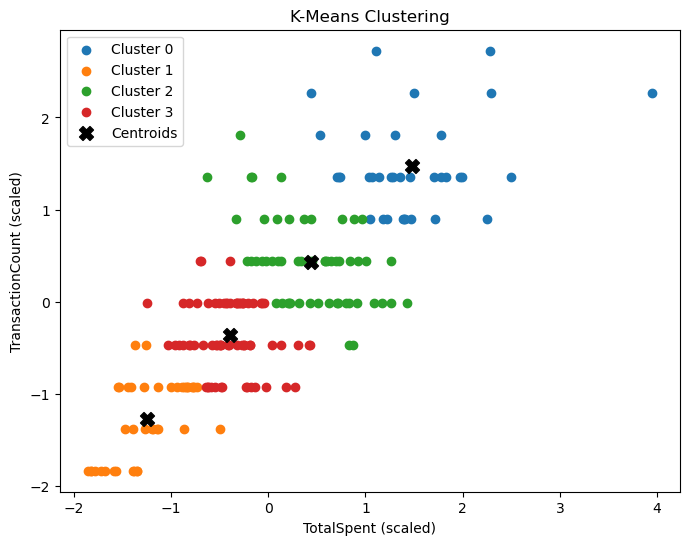

In [26]:
# Visualize Clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = X_scaled[clusters == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=100, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('TotalSpent (scaled)')
plt.ylabel('TransactionCount (scaled)')
plt.legend()
plt.show()